In [2]:
import os
import sys

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

In [3]:
# load csv file & make a copy
features_gtzan = pd.read_csv(MOUNTED_DATASET_PATH + '/data/features_gtzan.csv', index_col=0)
features_fma = pd.read_csv(MOUNTED_DATASET_PATH + '/data/features_fma.csv', index_col=0)
features_combined = features_gtzan.append(features_fma, ignore_index=True)
features_combined_original = features_combined.copy()

In [6]:
features_combined

,data_source,genre_label,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,gtzan,hiphop,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,gtzan,hiphop,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,gtzan,hiphop,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,gtzan,hiphop,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,gtzan,hiphop,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,fma,hiphop,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,fma,hiphop,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,fma,pop,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,fma,pop,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


In [7]:
# display data info
features_combined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 219 columns):
data_source               object
genre_label               object
lpc_1                     float64
lpc_2                     float64
lpc_3                     float64
lpc_4                     float64
mean_beats                float64
mean_beats_timestamp      float64
mean_db4_cA4              float64
mean_db4_cD1              float64
mean_db4_cD2              float64
mean_db4_cD3              float64
mean_db4_cD4              float64
mean_db5_cA4              float64
mean_db5_cD1              float64
mean_db5_cD2              float64
mean_db5_cD3              float64
mean_db5_cD4              float64
mean_db8_cA7              float64
mean_db8_cD1              float64
mean_db8_cD2              float64
mean_db8_cD3              float64
mean_db8_cD4              float64
mean_db8_cD5              float64
mean_db8_cD6              float64
mean_db8_cD7              float64
mean_mfcc_

In [5]:
# check if there's any null value(s)
features_combined.isnull().values.any()

False

In [8]:
# display stats
features_combined.describe()

,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,mean_db4_cD3,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
count,3299.0,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3.299000e+03,3.299000e+03,3.299000e+03,...,3.299000e+03,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3.299000e+03,3299.000000
mean,1.0,-1.758873,1.238318,-0.458429,1191.466714,14.446934,0.003937,3.533551e-07,-4.386176e-07,7.196879e-07,...,1.251172e+06,28.597025,15.304998,17.787201,17.522640,12.036170,11.226602,25.646335,5.730499e+06,0.001853
std,0.0,0.462848,0.609080,0.210002,198.416573,1.021869,0.066709,2.486827e-05,1.527351e-04,3.436413e-04,...,1.260224e+06,7.375461,5.269495,5.888974,5.817545,5.764949,7.405918,22.200516,5.030865e+06,0.002671
min,1.0,-3.132003,-0.918575,-1.154793,3.000000,0.034830,-1.261062,-3.522619e-04,-1.034112e-03,-2.619914e-03,...,3.223552e+03,2.225198,2.974539,5.090581,3.474756,2.493805,2.391152,0.684887,3.169143e+03,0.000004
25%,1.0,-2.062226,0.880658,-0.590622,1225.842420,14.343217,-0.000444,-3.900934e-07,-2.804290e-05,-8.850542e-05,...,4.089236e+05,24.234333,11.714167,13.623369,13.588766,8.327339,6.590867,10.758043,2.076580e+06,0.000397
50%,1.0,-1.779725,1.248724,-0.475843,1252.092593,14.571812,-0.000019,-3.657783e-07,-3.292124e-07,-5.077429e-07,...,8.895625e+05,27.952089,13.898599,16.588690,16.421719,10.861470,9.240046,19.165002,4.308772e+06,0.000958
75%,1.0,-1.469658,1.617934,-0.347833,1269.976801,14.754726,0.000327,-3.348543e-07,2.253785e-05,9.021642e-05,...,1.709425e+06,32.352037,17.471490,20.638816,20.251996,14.253171,13.407154,33.879856,7.967466e+06,0.002254
max,1.0,-0.012302,3.285984,0.950139,1993.088235,22.089689,1.431668,6.723673e-04,5.771547e-03,6.251538e-03,...,2.100554e+07,82.009116,57.179240,99.057350,61.851833,70.214433,93.970310,213.546349,4.211307e+07,0.056128


## Data Cleaning

In [9]:
# drop data_source row
features_combined = features_combined.drop(['data_source'], axis=1)

In [10]:
# map genre labels
GENRES_MAP = {
    'hiphop': 0,
    'rock': 1,
    'pop': 2,
}
features_combined['genre_label'] = features_combined['genre_label'].map(GENRES_MAP)
features_combined

,genre_label,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,0,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,-1.245192e-04,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,0,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,-9.212386e-05,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,0,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,-7.116798e-06,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,0,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,-2.028877e-05,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,0,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,-4.344582e-05,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,0,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,1.021450e-05,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,0,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,3.565250e-05,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,2,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,6.062675e-07,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,2,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,2.349206e-05,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


## Exploratory Data Analysis

### Categorrical feature

In [9]:
cat_dist = features_combined['genre_label'].value_counts(normalize=True).values
cat_dist

array([0.33343437, 0.33343437, 0.33313125])

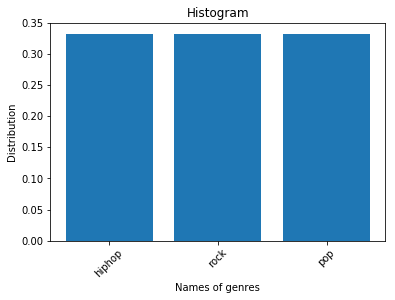

In [10]:
pyplot.xticks(range(len(cat_dist)), GENRES)
pyplot.xlabel('Names of genres')
pyplot.ylabel('Distribution')
pyplot.title('Histogram')
pyplot.xticks(rotation=45)
pyplot.bar(range(len(cat_dist)), cat_dist) 
pyplot.show()

### Numerical features

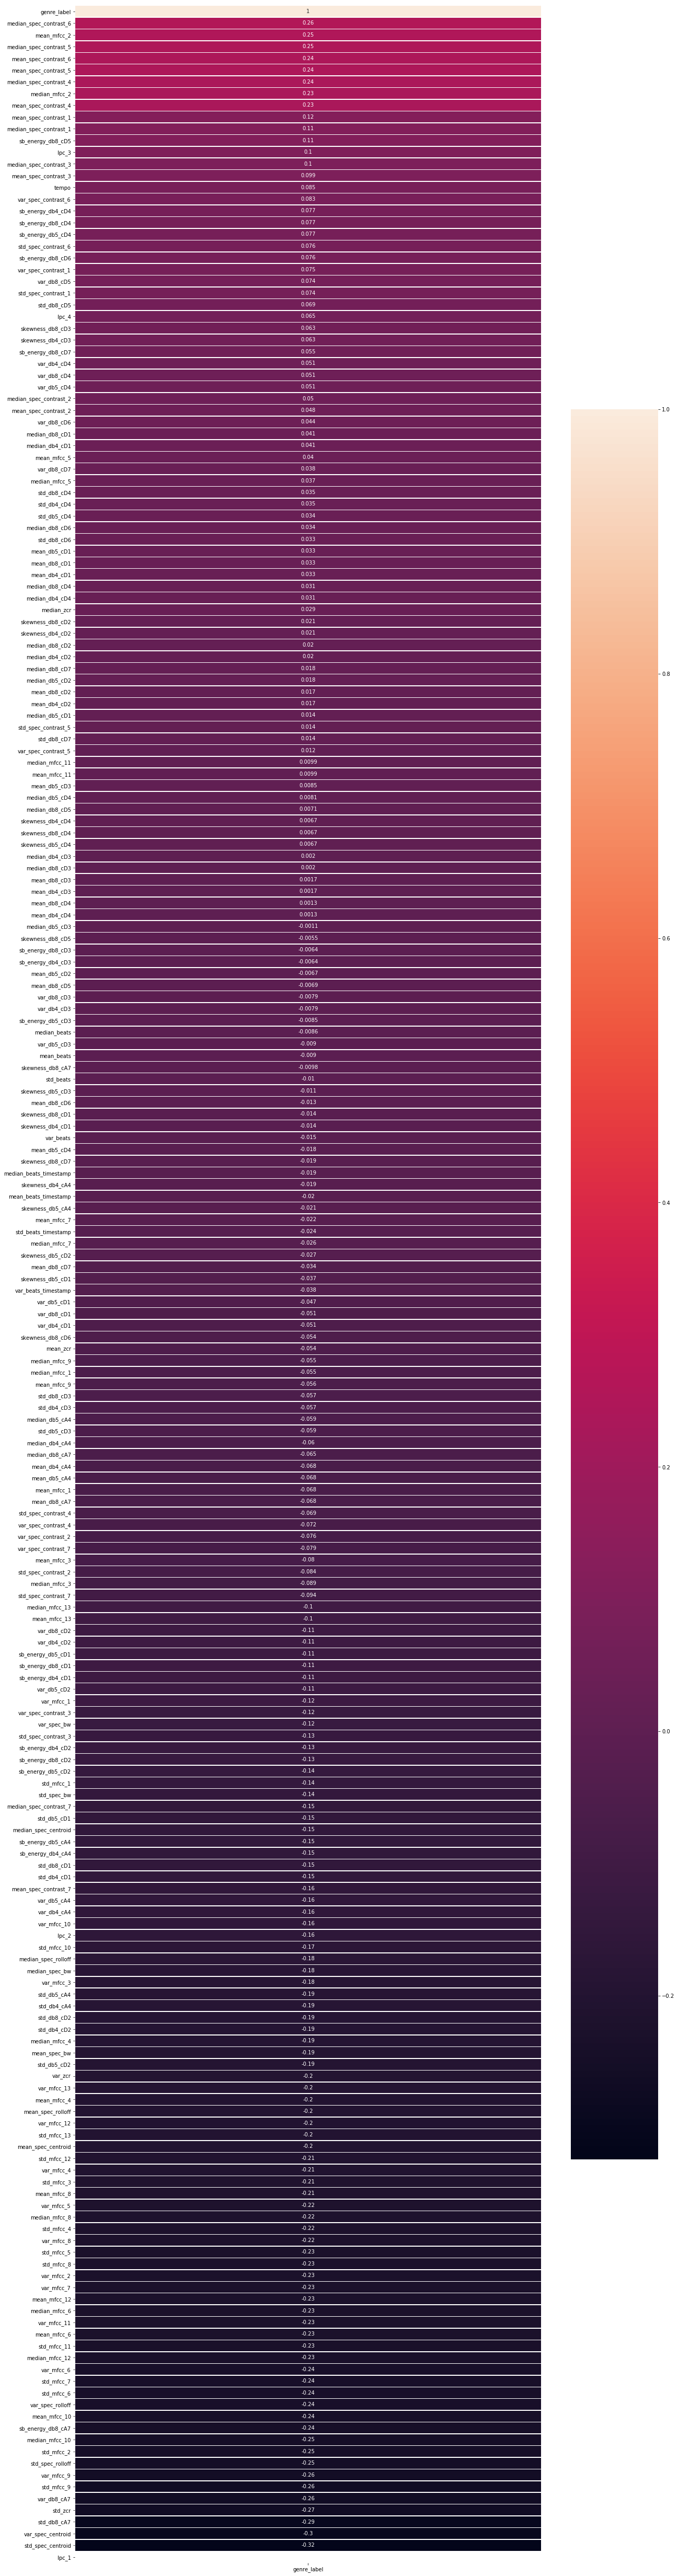

In [11]:
_, ax = pyplot.subplots(figsize=(20,90))
seaborn.heatmap(features_combined.corr()[['genre_label']].sort_values(by=['genre_label'], ascending=False),
                annot=True, linewidths=.5, ax=ax)

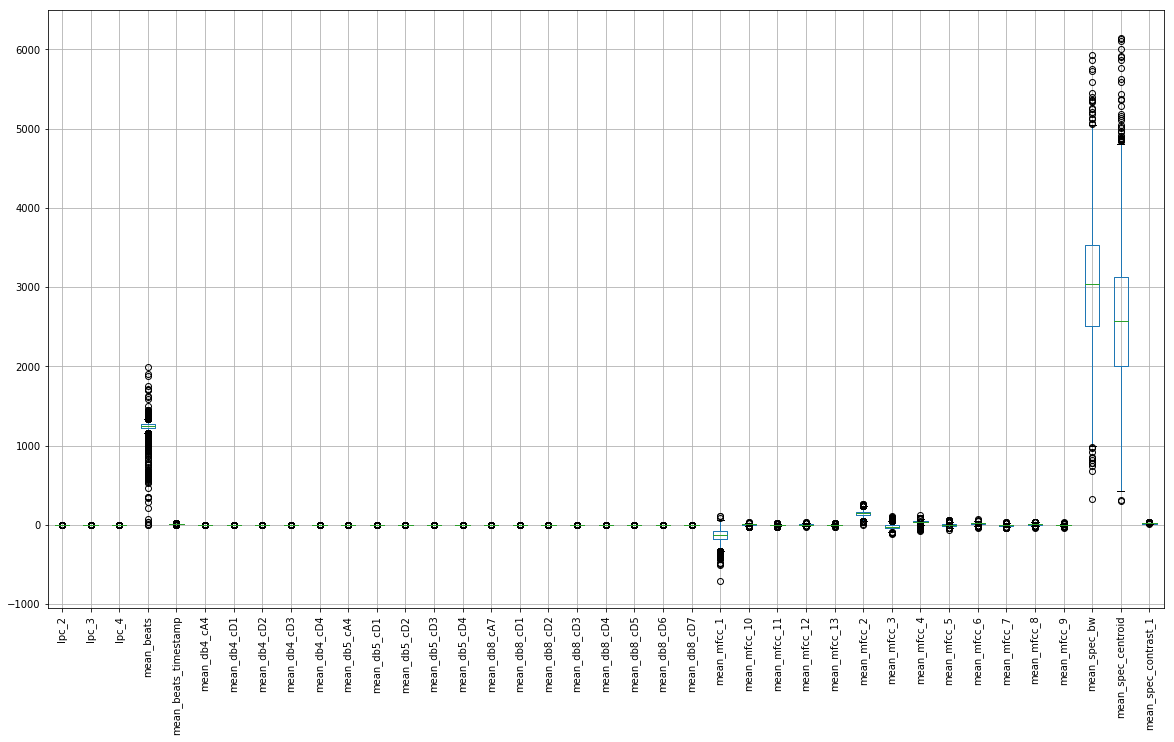

In [12]:
features_combined.iloc[:,2:41].boxplot(figsize=(20,11), rot=90)

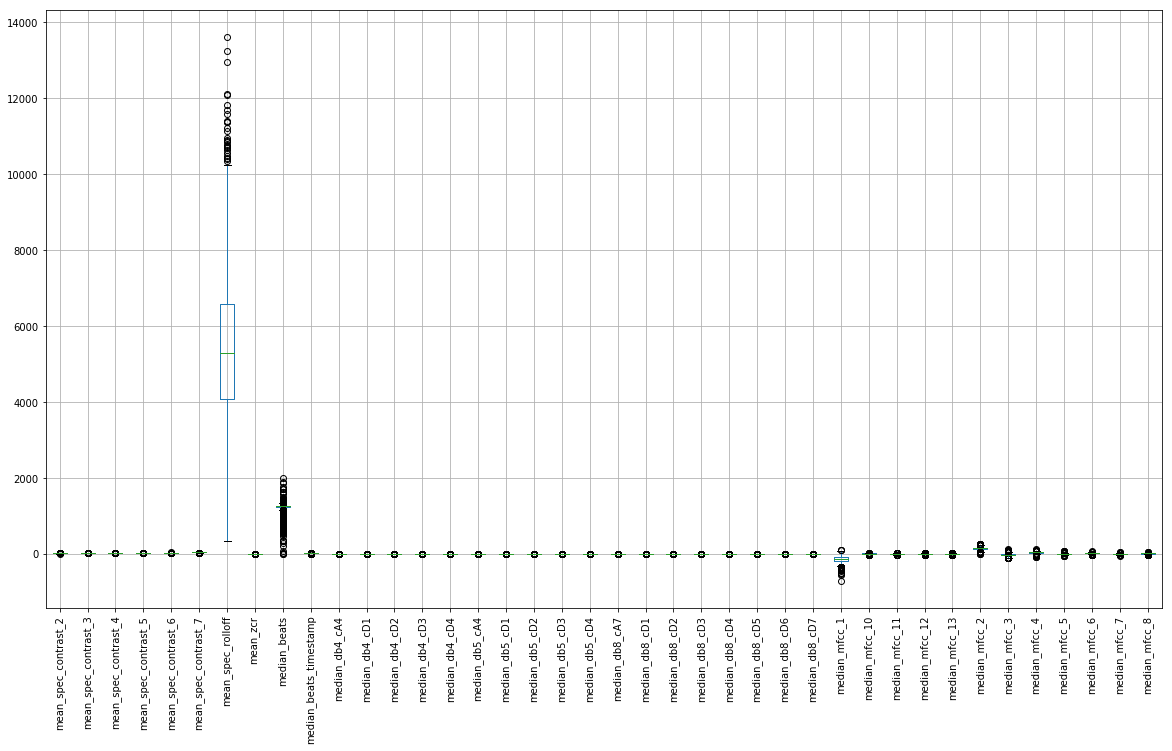

In [13]:
features_combined.iloc[:,41:81].boxplot(figsize=(20,11), rot=90)

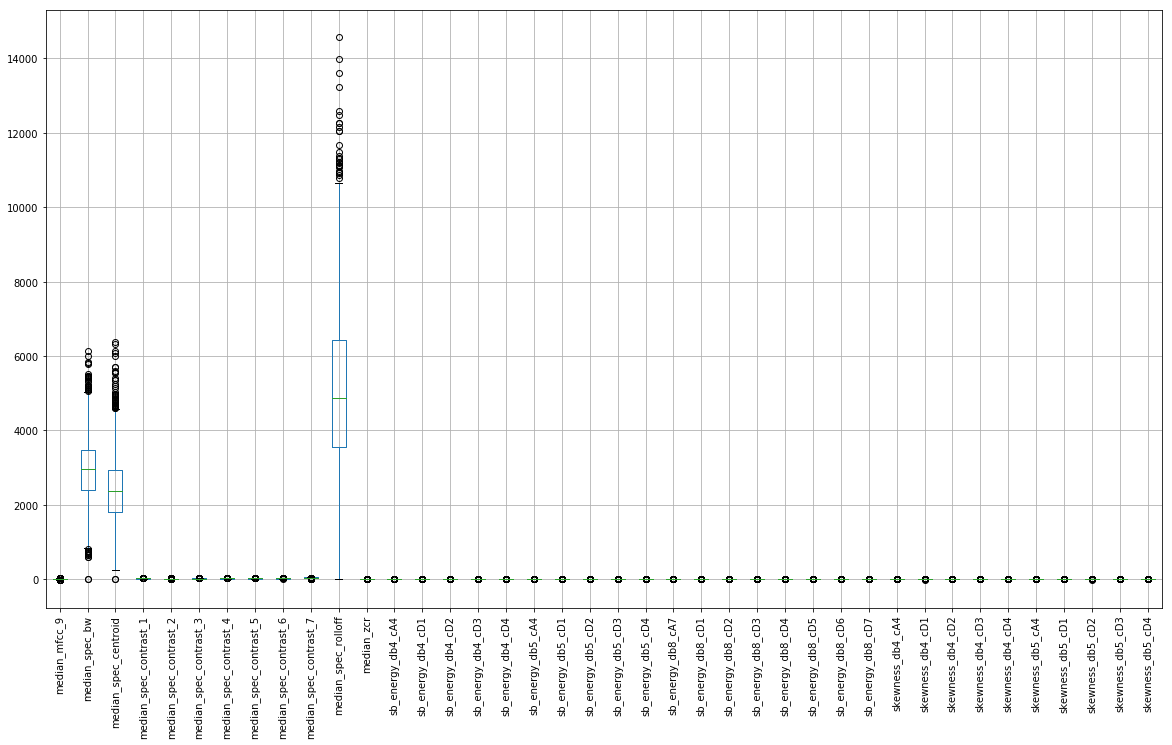

In [14]:
features_combined.iloc[:,81:121].boxplot(figsize=(20,11), rot=90)

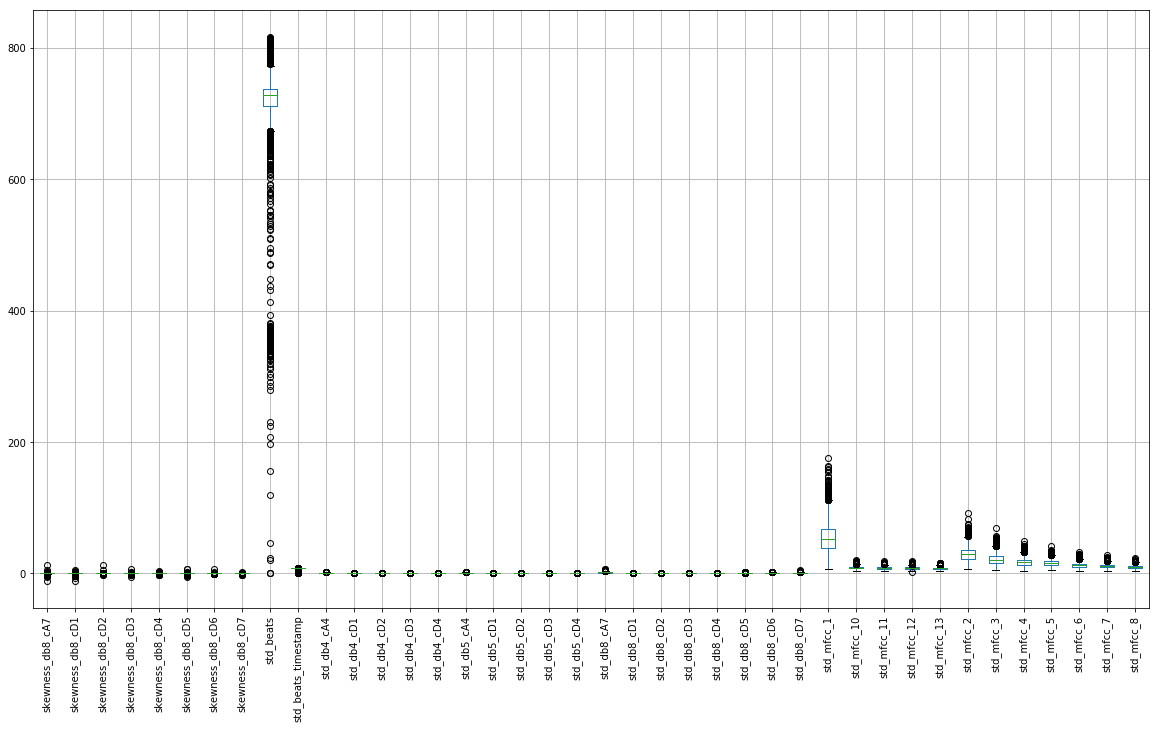

In [15]:
features_combined.iloc[:,121:161].boxplot(figsize=(20,11), rot=90)

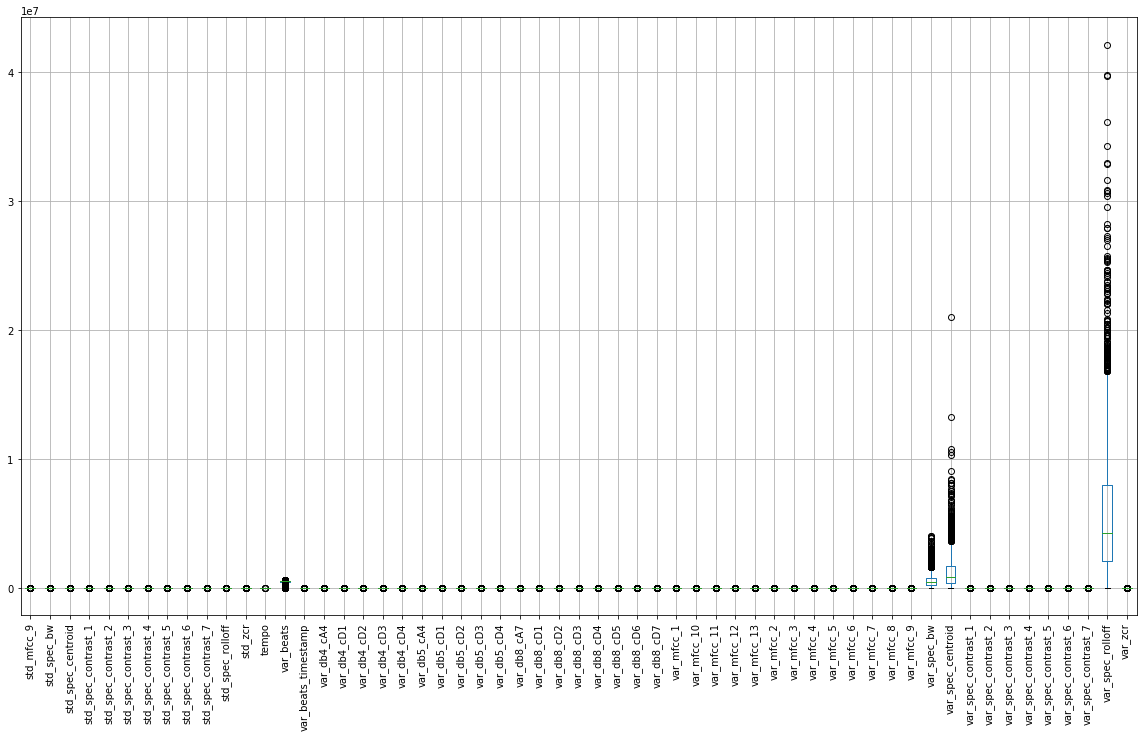

In [16]:
features_combined.iloc[:,161:].boxplot(figsize=(20,11), rot=90)

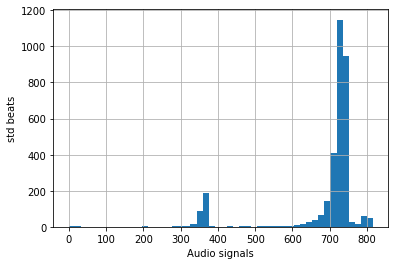

In [12]:
features_combined['std_beats'].hist(bins=50)
pyplot.xlabel("Audio signals")
pyplot.ylabel('std beats')
pyplot.show()

In [12]:
features_combined.to_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features.csv')

In [16]:
?np.log